In [1]:
# necessary imports
import torch
import matplotlib.pyplot as plt

# generate toy data according to simple linear model
N = 50
torch.manual_seed(3)
x = torch.linspace(0, 10, N)
y = x * 5 + torch.randn(N) * 10

In [2]:
# # Create a scatter plot
# fig, ax = plt.subplots()
# ax.scatter(x, y)

# # # Set the aspect ratio as specified
# # # 'equal' means same scaling from data to plot units for x and y
# ax.set_aspect(0.1)  # x:y = 1.5:1
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [3]:
# necessary imports
from torch.utils.data import DataLoader, Dataset

# define torch dataset
class LinearDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # torch dataset must have __getitem__ method!
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # torch dataset must have __len__ method!
    def __len__(self):
        return len(self.x)

# define dataloader
dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=8)

In [4]:
# necessary imports
from torch import nn
from torch.optim import AdamW

# define model
class LinearModel(nn.Module):
    # initialize model parameters
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    # model must have forward method!
    def forward(self, x):
        x = self.linear(x)
        return x

# instantiate model
model = LinearModel()

# define loss function
loss_fn = nn.MSELoss()

# instantiate optimizer with model parameters
optimizer = AdamW(model.parameters(), lr=0.01)

In [5]:
# training loop
epochs = 1000

for epoch in range(epochs):
    for x, y in dataloader:
        # add batch dimension
        x = x.unsqueeze(1)
        y = y.unsqueeze(1)

        # reset optimizer
        optimizer.zero_grad()

        # forward pass
        y_pred = model(x)

        # calculate loss and backward pass
        loss = loss_fn(y_pred, y)
        loss.backward()

        # update model parameters
        optimizer.step()

In [6]:
N = 50
torch.manual_seed(3)
x = torch.linspace(0, 10, N)
y = x * 5 + torch.randn(N) * 10

In [7]:
y_pred = model(x.unsqueeze(1)).detach()

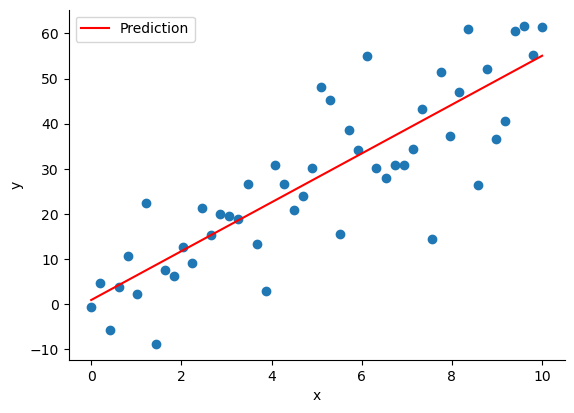

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y)  # Optional: label for scatter points

# Set the aspect ratio as specified
ax.set_aspect(0.1)  # x:y ratio
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Plot the prediction line and add a label
ax.plot(x, y_pred, c='r', label='Prediction')

# Add the legend
ax.legend()

# Display the plot
plt.show()


In [12]:
next(iter(model.parameters()))

Parameter containing:
tensor([[5.4170]], requires_grad=True)